In [1]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [2]:
ENERGY_TRACE="../satellite/solar_harvested_energy.csv"
IMAGE_TRACE="../pkg/model/image_log_with_alt.csv"

In [3]:
energy = pd.read_csv(ENERGY_TRACE)
images = pd.read_csv(IMAGE_TRACE)

In [4]:
images["time_s"] = images["t_ms"] / 1000

<Axes: xlabel='time_s', ylabel='is_sunlit'>

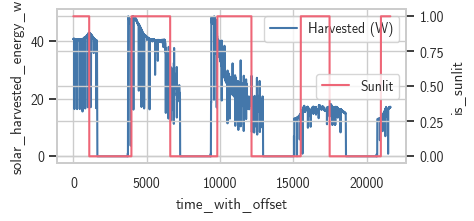

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

offset = 0
energy["time_with_offset"] = energy["time_s"] + offset

sns.lineplot(data=energy, x="time_with_offset", y="solar_harvested_energy_w", label="Harvested (W)", ax=ax1, color=pal[0], estimator=None)
sns.lineplot(data=images, x="time_s", y="is_sunlit", label="Sunlit", ax=ax2, color=pal[1], estimator=None)

<Axes: xlabel='time_s', ylabel='is_sunlit'>

/Users/tobias/Uni/git/project-spencer/trabant/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/tobias/Uni/git/project-spencer/trabant/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


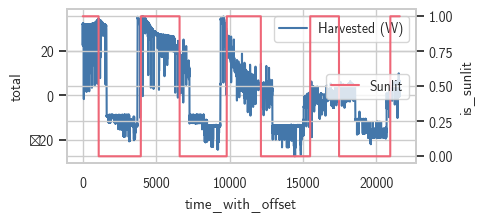

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

energy["total"] = energy["solar_harvested_energy_w"] - energy["total_energy_w"]

sns.lineplot(data=energy, x="time_with_offset", y="total", label="Harvested (W)", ax=ax1, color=pal[0], estimator=None)
sns.lineplot(data=images, x="time_s", y="is_sunlit", label="Sunlit", ax=ax2, color=pal[1], estimator=None)